# Mission 1-1

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (48.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120875 files and direc

In [ ]:
import torch
use_cuda = torch.cuda.is_available()
print(use_cuda)

True


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
from PIL import Image
from torchvision.transforms import ToTensor
import unicodedata
import random

import torch
from torchvision import datasets, transforms

In [ ]:
#한글 폰트 설정
import matplotlib.font_manager as fm

plt.rc('font', family='NanumGothic')
plt.rc('font', size=15)

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)), # 일반적으로 224 224 사용한다고 함
    transforms.ToTensor()
])

In [ ]:
path = "/content/drive/MyDrive/kfood_train"
data = datasets.ImageFolder(path, transform = transform)
dataloader = torch.utils.data.DataLoader(data, batch_size=64, shuffle=True)

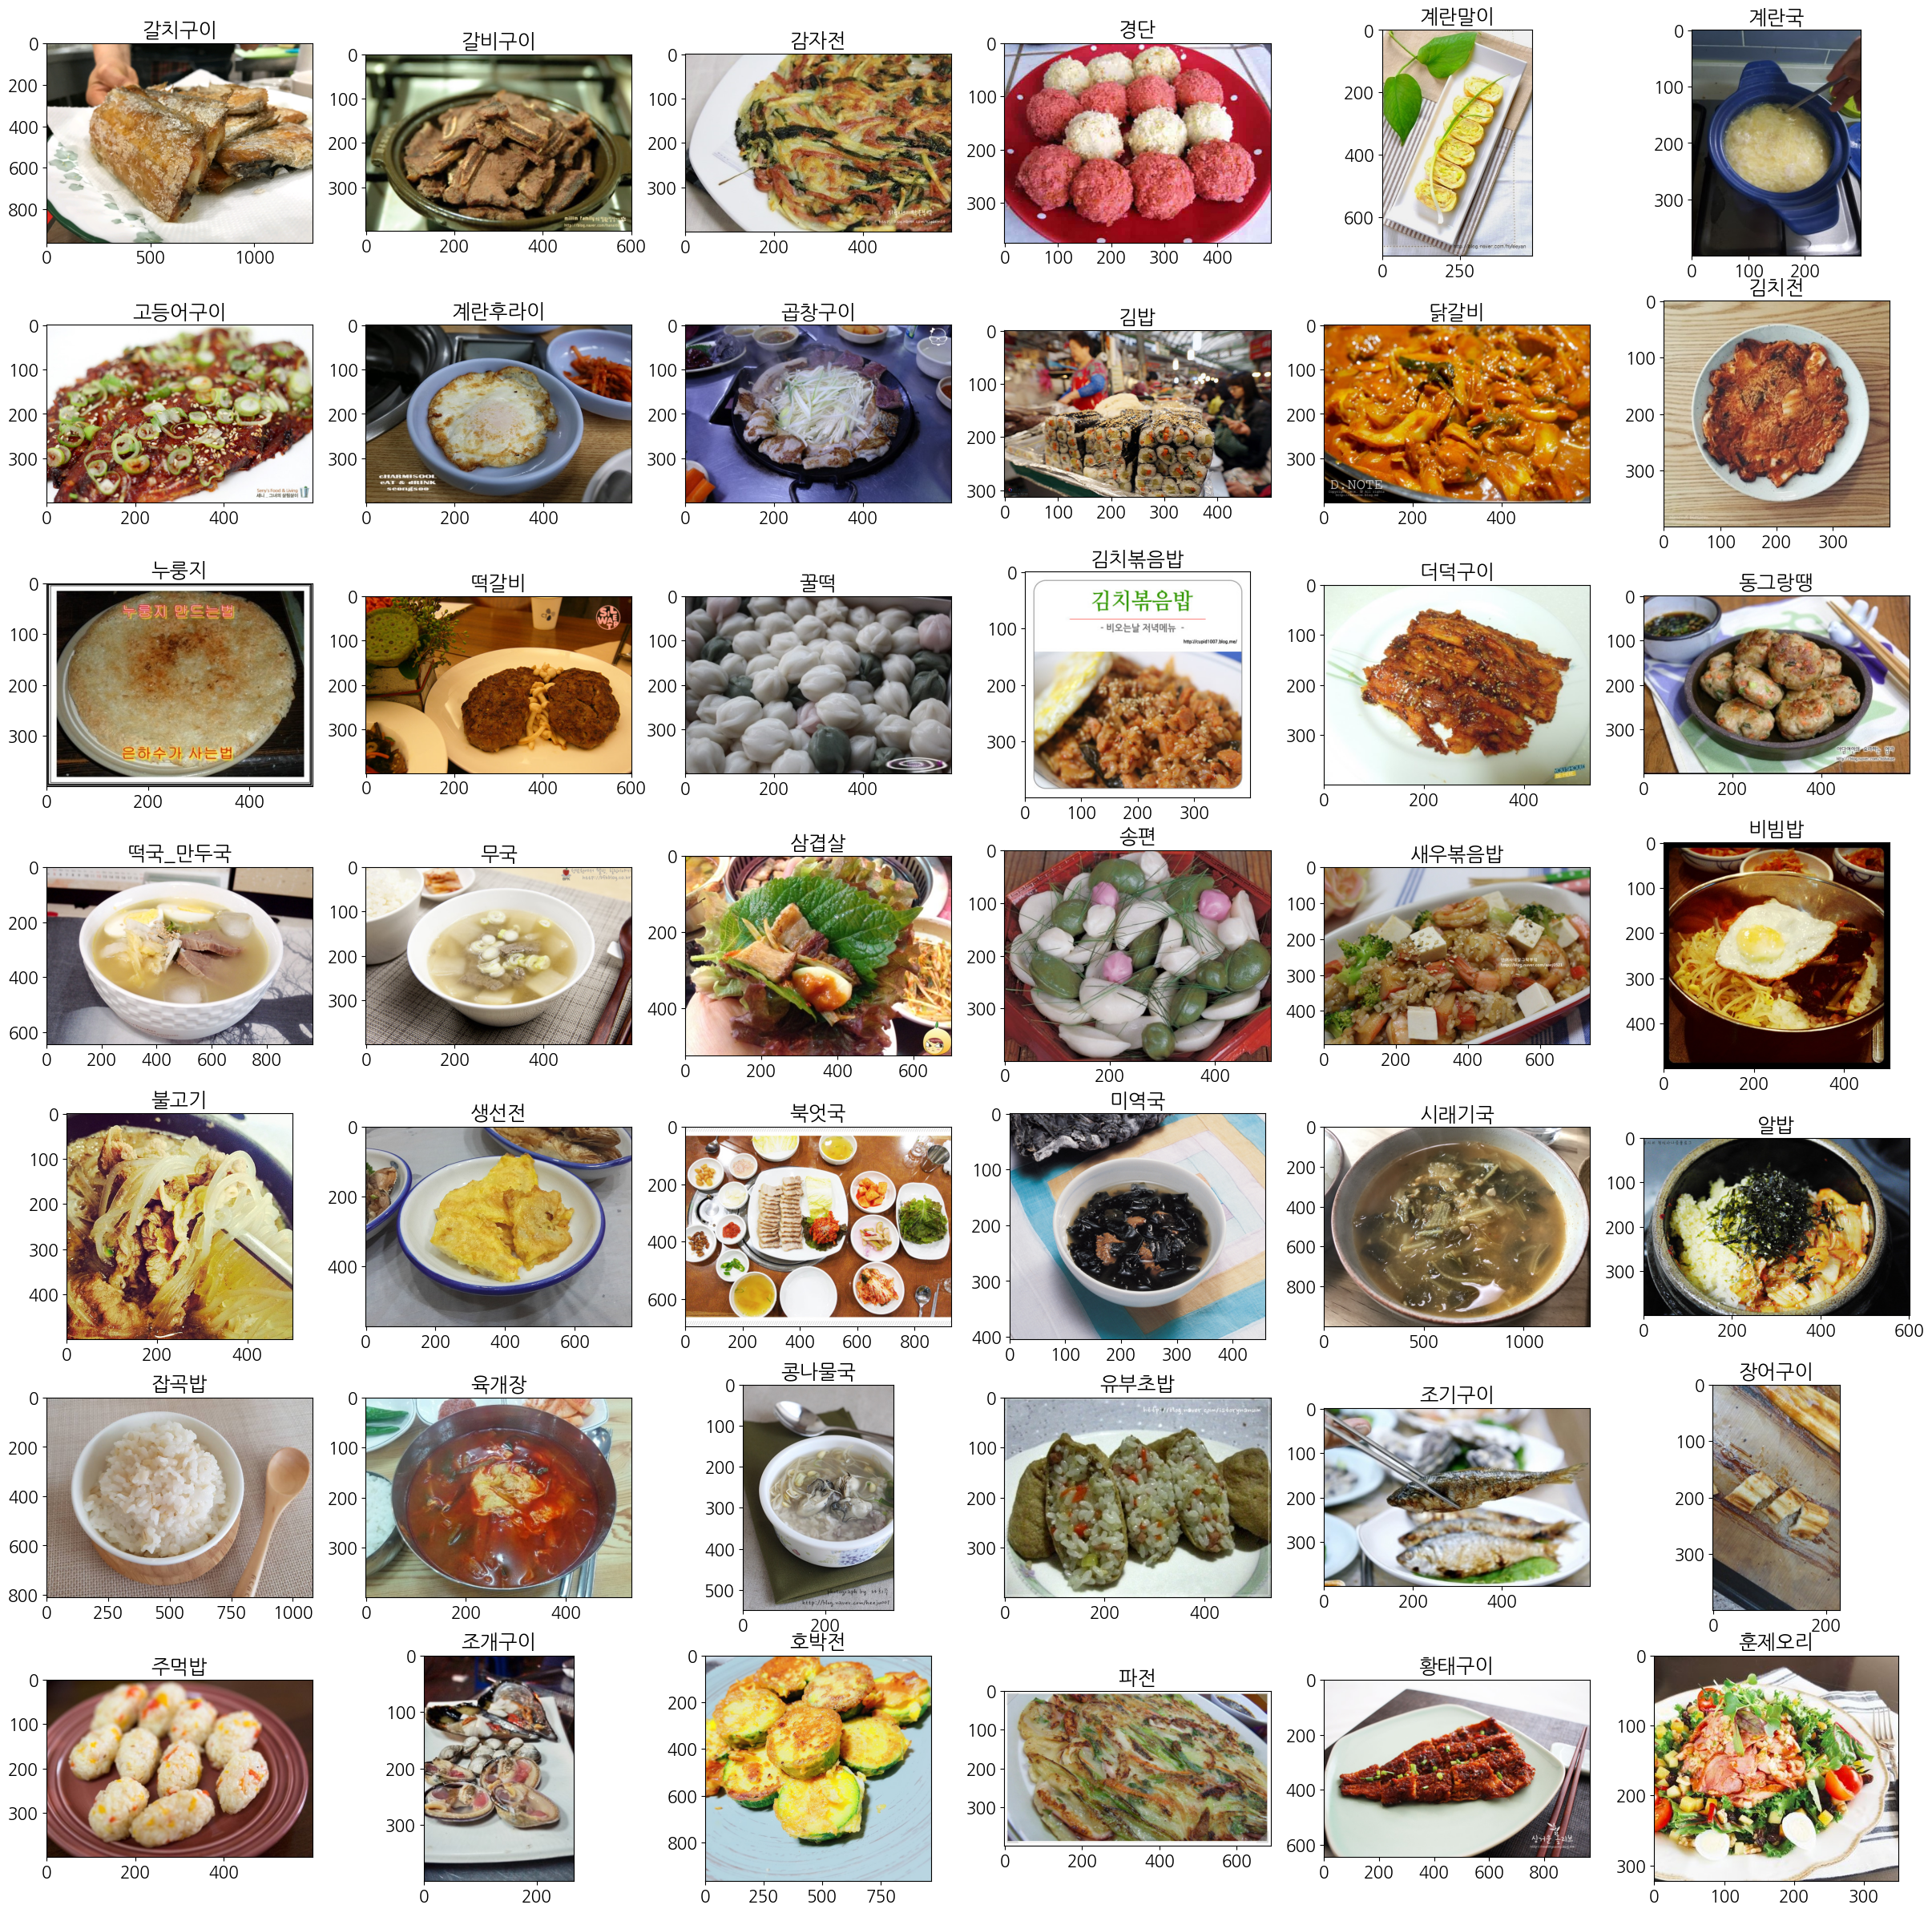

In [ ]:
fig = plt.figure(figsize=(30, 30))

# train 폴더 내의 하위 폴더(클래스) 목록을 가져옵니다.
root_dir = '/content/drive/MyDrive/kfood_train/train'
class_names = [dir for dir in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, dir))]

class_images = []
for class_name in class_names:
    # 각 클래스의 폴더에서 랜덤으로 이미지 한 장을 가져옵니다.
    class_dir = os.path.join(root_dir, class_name)
    image_files = [file_name for file_name in os.listdir(class_dir) if file_name.endswith(('.jpg'))]

    if image_files:
        random_image = random.choice(image_files)
        img_path = os.path.join(class_dir, random_image)

        # 선택된 이미지 파일을 열고 텐서로 변환합니다.
        img = Image.open(img_path)
        img_tensor = ToTensor()(img)
        class_images.append(img_tensor)
    '''
    for file_name in os.listdir(class_dir):
        if file_name.endswith(('.jpg')):
            # 첫 번째 이미지 파일을 열고 텐서로 변환합니다.
            img_path = os.path.join(class_dir, file_name)
            img = Image.open(img_path)
            img_tensor = ToTensor()(img)
            class_images.append(img_tensor)
            break
      '''

normalized_class_names = [unicodedata.normalize('NFC', name) for name in class_names]

for i,img in enumerate(class_images):
    ax = fig.add_subplot(7, 6 ,i+1)
    ax.imshow(img.permute(1,2,0))
    ax.set_title(normalized_class_names[i])
plt.show()


# Mission 1-2

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

# 데이터 변환 정의 - 정규화만 수행
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    '''
    ImageNet 데이터셋의 RGB 채널별 평균과 표준편차
    이미지를 정규화하는 데 널리 사용되는 값
    '''
])

In [ ]:
# 데이터셋 로드
train_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/kfood_train_resized/train', transform=transform)
val_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/kfood_val_resized/val', transform=transform)

# 데이터 로더 생성
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1024)

In [ ]:
# ResNet18 모델 로드 (pretrained=False)
model = models.resnet18(pretrained=False)

# 분류기 변경 (클래스 개수를 42개로 설정)
model.fc = nn.Linear(model.fc.in_features, 42)

In [ ]:
# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

device

device(type='cuda', index=0)

In [ ]:
num_epochs=1
from tqdm import tqdm

for epoch in range(num_epochs):
    model.train()

    for inputs, labels in tqdm(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs=model(inputs)
        loss=criterion(outputs ,labels)

        loss.backward()
        optimizer.step()

    model.eval()

    corrects=0

    for val_inputs,val_labels in tqdm(val_loader):

        val_inputs=val_inputs.to(device)
        val_labels=val_labels.to(device)

        outputs=model(val_inputs)
        _, preds=torch.max(outputs,dim=1)
        corrects +=torch.sum(preds==val_labels.data)

    accuracy=float(corrects)/len(val_dataset)*100
    print(f'Epoch {epoch+1}/{num_epochs}, validation accuracy: {accuracy} %')


  0%|          | 0/33 [00:00<?, ?it/s]


TypeError: ignored

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

# 데이터 변환 정의 - 정규화만 수행
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 로드
train_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/kfood_train_resized/train', transform=transform)
val_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/kfood_val_resized/val', transform=transform)

# 데이터 로더 생성
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1024)

# ResNet18 모델 로드 (pretrained=False)
model = models.resnet18(pretrained=False)

# 분류기 변경 (클래스 개수를 42개로 설정)
model.fc = nn.Linear(model.fc.in_features, 42)

# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model.to(device)

num_epochs=1

for epoch in range(num_epochs):
    model.train()

    for inputs, labels in train_loader:
        # inputs = inputs.to(device) # -> gpu로 가져오는 과정이라 device를 cpu로 바꾸고 해보는 중 ~
        # labels = labels.to(device)

        optimizer.zero_grad()

        outputs=model(inputs)
        loss=criterion(outputs ,labels)

        loss.backward()
        optimizer.step()

    model.eval()

    corrects=0

    for val_inputs,val_labels in val_loader:

        val_inputs=val_inputs.to(device)
        val_labels=val_labels.to(device)

        outputs=model(val_inputs)
        _, preds=torch.max(outputs,dim=1)
        corrects +=torch.sum(preds==val_labels.data)

    accuracy=float(corrects)/len(val_dataset)*100
    print(f'Epoch {epoch+1}/{num_epochs}, validation accuracy: {accuracy} %')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


KeyboardInterrupt: ignored

### 일부만 불러오기 ~

In [ ]:
import numpy as np
import torch

class PartialDataset(torch.utils.data.Dataset):
    def __init__(self, original_dataset, ratio=0.1):
        self.original_dataset = original_dataset
        self.ratio = ratio
        self.indices = self.get_indices()

    def get_indices(self):
        all_indices = list(range(len(self.original_dataset)))
        np.random.shuffle(all_indices)

        num_samples = int(len(self.original_dataset) * self.ratio)

        return all_indices[:num_samples]

    def __getitem__(self,index):
         return self.original_dataset[self.indices[index]]

    def __len__(self):
         return len(self.indices)


In [ ]:
import torch
print(torch.cuda.is_available())

True


In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

# 데이터 변환 정의 - 정규화만 수행
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 원본 데이터셋 로드
original_train_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/kfood_train_resized/train', transform=transform)
original_val_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/kfood_val_resized/val', transform=transform)

# 원본 데이터셋에서 일부만 사용하는 새로운 데이터셋 생성
train_dataset = PartialDataset(original_train_dataset, ratio=0.1)
val_dataset = PartialDataset(original_val_dataset, ratio = 0.1)

# 새로운 DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)


# ResNet18 모델 로드 (pretrained=False)
model = models.resnet18(pretrained=False)

# 분류기 변경 (클래스 개수를 42개로 설정)
model.fc = nn.Linear(model.fc.in_features, 42)

# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model.to(device)

from tqdm import tqdm

num_epochs = 1

for epoch in range(num_epochs):
    model.train()

    # 학습 데이터에 대한 진행 상황 바 추가
    train_progress_bar = tqdm(train_loader, desc='Train', total=len(train_loader))

    for inputs, labels in train_progress_bar:
        # inputs = inputs.to(device)
        # labels = labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs ,labels)

        loss.backward()
        optimizer.step()

        # 진행 상황 바 업데이트 (학습 손실 표시)
        train_progress_bar.set_postfix({'train_loss': loss.item()})

    model.eval()

    corrects=0

    # 검증 데이터에 대한 진행 상황 바 추가
    val_progress_bar = tqdm(val_loader, desc='Validate', total=len(val_loader))

    for val_inputs,val_labels in val_progress_bar:

        val_inputs=val_inputs.to(device)
        val_labels=val_labels.to(device)

        outputs=model(val_inputs)

        _, preds=torch.max(outputs,dim=1)

        corrects +=torch.sum(preds==val_labels.data)

    accuracy=float(corrects)/len(val_dataset)*100

    print(f'Epoch {epoch+1}/{num_epochs}, validation accuracy: {accuracy} %')


Train:  11%|█▏        | 6/53 [02:47<21:50, 27.88s/it, train_loss=3.87]


KeyboardInterrupt: ignored